In [3]:
# Import libraries and data
import sys
import numpy as np


from src.utils.linear_regressor import perform_linear_regression
from src.utils.column_import import columns
s_x, s_y, v_x, v_y, a_x, a_y = columns



# Distance model (5 parameters)
Here we solve the following model

$$ s_i(k+1) = s_i(k) +\theta_{s_1}  s_i(k-1) +\theta_{s_2} s_i(k-2) +\theta_{s_3} v_i(k)   +\theta_{s_4} v_i(k-1) 
+\theta_{s_5} a_i(k)$$



## Data shifting


In [4]:
X = np.vstack((
    s_x[2:-1],        #s[k]   
    s_x[1:-2],        #s[k-1]
    s_x[ :-3],        #s[k-2]
    v_x[2:-1],        #v[k]
    v_x[1:-2],        #v[k-1]
    a_x[2:-1]         #a[k]
    )).T

y = s_x[3:]
print("A matrix: " + str(X.shape))
print("target matrix: " + str(np.array(y).shape))

A matrix: (205272, 6)
target matrix: (205272,)


### Perform Linear Regression


Linear regression with 6 parameters
Mean Squared Error (MSE): 2.0073e+01
Mean Absolute Error (MAE): 4.6942e-01
R-squared (R²) Score: 9.8860e-01
Coefficients:
0.9904864212924135
0.0002716181697085987
-7.953358114314761e-05
0.04315104492759223
-0.0027821611585432285
-0.03824475167448535


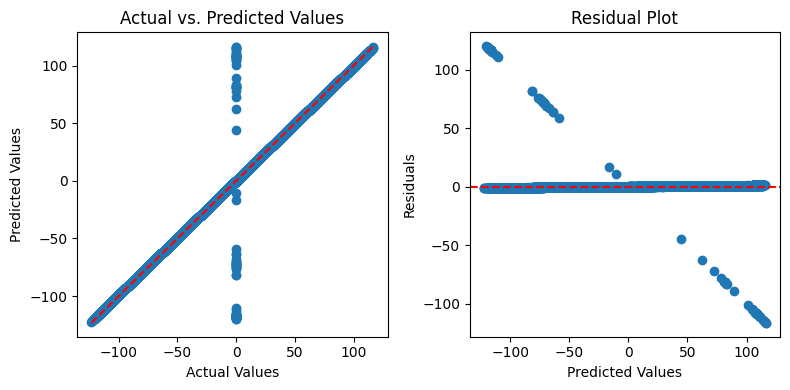

LinearRegression()

In [5]:
print("Linear regression with 6 parameters")
perform_linear_regression(X, y)